In [ ]:
# 이미지 파일 처리를 하기 위해서 필요한 package(module)이 있어요!
!conda install -c conda-forge tqdm # progressbar를 표현할 수 있어요!
!conda install -c conda-forge ipywidgets # progressbar를 표현하기 위해서 필요!
!conda install -c conda-forge opencv # 이미지 처리(resize, 흑백처리)

In [2]:
# 이미지 파일을 읽어서 CSV 파일로 변환해보아요!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv # opencv
from sklearn import utils
from tqdm.auto import tqdm # progressbar를 사용하기 위해
import os

In [ ]:
# 파일경로
train_dir = 'C:/education/KDT/Kaggle/Dogs vs. Cats/train/'

# 함수를 하나 생성
# 고양이 이미지는 0으로 개 이미지는 1로
# label을 생성하는 함수를 작성
def labeling(img): # img : file명(ex. cat.0.jpg)
    class_name = img.split('.')[0] # class_name => 'cat' or 'dog'
    if class_name == 'cat':
        return 0
    elif class_name =='dog':
        return 1

# pixel data(x_data)와 label data(t_data)를 담을 리스트를 선언
x_data = []
t_data = []

file_list = os.listdir(train_dir) # 특정 폴더 안에 있는 파일 명들을 list로 담을 수 있어요!

for img in tqdm(file_list,
                total=len(file_list),
                position=0,
                leave=True):
    label_data = labeling(img) # 현재 파일의 label(0 or 1)를 알아와요!
    # 이미지 파일의 전체 경로를 생성
    path = os.path.join(train_dir, img) # 'C:/education/현대로템/Kaggle/Dogs vs. Cats/train/' + 'cat.0.jpg'
    # 이미지 파일의 ndarray를 가져오려면 (cv.imread())
    img_data = cv.resize(cv.imread(path, cv.IMREAD_GRAYSCALE), (80,80)) # 이미지를 읽으면서 흑백이미지로 변환하고 크기 조정

    # 1개의 파일에 대한 픽셀정보와 레이블정보가 준비되었으니
    x_data.append(img_data.ravel())
    t_data.append(label_data)

In [ ]:
# DataFrame으로 변환시키면 될 거 같아요!
t_df = pd.DataFrame({
    'label' : t_data
})

x_df = pd.DataFrame(x_data) # 6400개의 pixel값이 각 column으로 생성

In [6]:
display(x_df)
display(t_df)

,0,1,2,3,4,5,6,7,8,9,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,169,174,180,184,188,191,196,198,201,203,...,3,3,3,3,2,2,2,2,2,2
1,43,43,58,45,35,28,40,52,37,41,...,38,39,44,53,59,57,70,71,47,33
2,42,38,45,46,58,57,54,59,48,51,...,88,126,156,165,137,135,149,162,171,154
3,220,224,225,230,223,228,230,225,228,227,...,236,232,228,204,204,203,216,221,212,213
4,114,120,115,88,96,139,127,185,130,196,...,105,101,91,95,92,97,120,89,96,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,140,143,144,146,147,148,148,149,150,152,...,164,164,164,165,167,166,168,168,168,169
24996,106,78,112,98,120,57,107,76,71,61,...,79,84,101,91,95,81,79,75,97,74
24997,35,36,63,69,41,51,48,47,44,64,...,130,119,136,139,98,83,113,96,114,174
24998,255,249,237,223,202,167,121,72,61,72,...,114,97,109,115,104,103,125,110,109,120


,label
0,0
1,0
2,0
3,0
4,0
...,...
24995,1
24996,1
24997,1
24998,1


In [7]:
df = pd.merge(t_df, x_df, left_index=True, right_index=True)
display(df)

,label,0,1,2,3,4,5,6,7,8,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,0,169,174,180,184,188,191,196,198,201,...,3,3,3,3,2,2,2,2,2,2
1,0,43,43,58,45,35,28,40,52,37,...,38,39,44,53,59,57,70,71,47,33
2,0,42,38,45,46,58,57,54,59,48,...,88,126,156,165,137,135,149,162,171,154
3,0,220,224,225,230,223,228,230,225,228,...,236,232,228,204,204,203,216,221,212,213
4,0,114,120,115,88,96,139,127,185,130,...,105,101,91,95,92,97,120,89,96,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1,140,143,144,146,147,148,148,149,150,...,164,164,164,165,167,166,168,168,168,169
24996,1,106,78,112,98,120,57,107,76,71,...,79,84,101,91,95,81,79,75,97,74
24997,1,35,36,63,69,41,51,48,47,44,...,130,119,136,139,98,83,113,96,114,174
24998,1,255,249,237,223,202,167,121,72,61,...,114,97,109,115,104,103,125,110,109,120


In [ ]:
# DataFrame 안에 있는 행들을 랜덤하게 섞어야할 것 같아요!
shuffle_df = utils.shuffle(df)
display(shuffle_df)

# DataFrame을 CSV로 저장하면 될 거 같아요!
shuffle_df.to_csv(train_dir + "cat_dog_full_train.csv", index=False)

,label,0,1,2,3,4,5,6,7,8,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
421,0,6,7,7,8,7,10,9,9,9,...,10,15,7,6,4,11,8,8,8,8
19119,1,203,140,140,141,140,142,143,148,154,...,107,77,88,99,91,74,80,88,65,73
18574,1,98,94,106,94,82,86,101,112,134,...,157,125,125,149,69,134,89,121,110,126
13657,1,29,32,29,32,28,29,30,31,36,...,246,231,198,231,230,228,233,238,240,229
6694,0,37,39,39,46,53,75,76,65,48,...,236,233,231,251,250,240,226,207,234,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23664,1,49,74,49,43,73,69,73,71,71,...,150,145,144,149,155,151,156,146,149,156
9203,0,41,40,40,39,37,34,31,31,32,...,21,21,21,20,19,19,24,19,16,25
16581,1,176,159,157,140,23,32,55,94,116,...,152,164,169,172,148,169,151,163,176,164
9667,0,97,101,102,113,114,110,119,121,108,...,140,139,136,131,135,138,139,138,138,131


In [2]:
# 파일이 생성되었으니 CNN을 이용해서 고양이와 개 이진분류 모델을 만들어보아요!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [3]:
# Raw Data Loading
df = pd.read_csv('C:/education/KDT/Kaggle/Dogs vs. Cats/train/cat_dog_full_train.csv')
display(df)

,label,0,1,2,3,4,5,6,7,8,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,0,6,7,7,8,7,10,9,9,9,...,10,15,7,6,4,11,8,8,8,8
1,1,203,140,140,141,140,142,143,148,154,...,107,77,88,99,91,74,80,88,65,73
2,1,98,94,106,94,82,86,101,112,134,...,157,125,125,149,69,134,89,121,110,126
3,1,29,32,29,32,28,29,30,31,36,...,246,231,198,231,230,228,233,238,240,229
4,0,37,39,39,46,53,75,76,65,48,...,236,233,231,251,250,240,226,207,234,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1,49,74,49,43,73,69,73,71,71,...,150,145,144,149,155,151,156,146,149,156
24996,0,41,40,40,39,37,34,31,31,32,...,21,21,21,20,19,19,24,19,16,25
24997,1,176,159,157,140,23,32,55,94,116,...,152,164,169,172,148,169,151,163,176,164
24998,0,97,101,102,113,114,110,119,121,108,...,140,139,136,131,135,138,139,138,138,131


In [4]:
# 데이터 분리
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values.reshape(-1, 1)

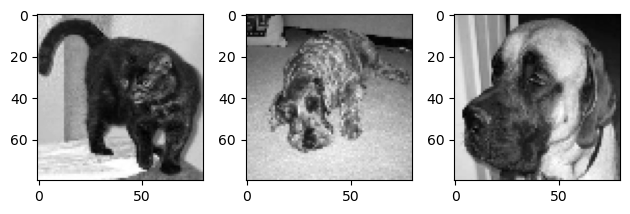

In [5]:
# 이미지 확인
fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.imshow(x_data[152:153].reshape(80, 80), cmap='gray')
ax2.imshow(x_data[162:163].reshape(80, 80), cmap='gray')
ax3.imshow(x_data[182:183].reshape(80, 80), cmap='gray')

plt.tight_layout()
plt.show()

In [6]:
# train test 데이터 분할
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(x_data,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=42)

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

In [7]:
# Model 구현
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='SAME',
                 activation='relu',
                 input_shape=(80,80,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='SAME',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='VALID',
                 activation='relu'))
model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='VALID',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='VALID',
                 activation='relu'))

# FC Layer ( Classifier )
model.add(Flatten())
model.add(Dropout(rate=0.5))

# Hidden Layer
model.add(Dense(units=128))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Output Layer
model.add(Dense(units=1,
                activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 80, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 256)       2

In [8]:
# Model 설정
model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# callback 생성 - 일단 넘어가요!

In [1]:
# GPU를 사용해보아요!
# 1. tensoeflow 버전이 GPU 를 지원하는 버전이어야해요!
#    기본버전(1.x)에서는 tensorflow_cpu, tensorflow gpu가 따로 존재
#    각각 설치해서 사용했어야 해요! 하지만 이제는 tensorflow만 설치해도
#    GPU를 사용할 수 있어요!
# 2. CUDA, cuDNN 라이브러리를 설치
#    그럼 최신버전을 받아서 사용해야 하나요?
#    궁합이 잘 맞는 버전이 있어요.
#    CUDA 11.8버전 사용, cuDNN 버전은 8.6버전, python 3.8버전
import tensorflow as tf

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# Model 학습
history = model.fit(x_data_train_norm.reshape(-1,80,80,1),
                    t_data_train,
                    epochs=100,
                    verbose=1,
                    validation_split=0.3,
                    batch_size=100)

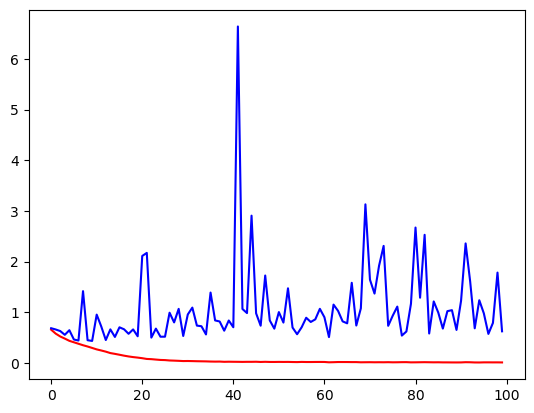

In [15]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, color='r')
plt.plot(val_loss, color='b')

plt.show()

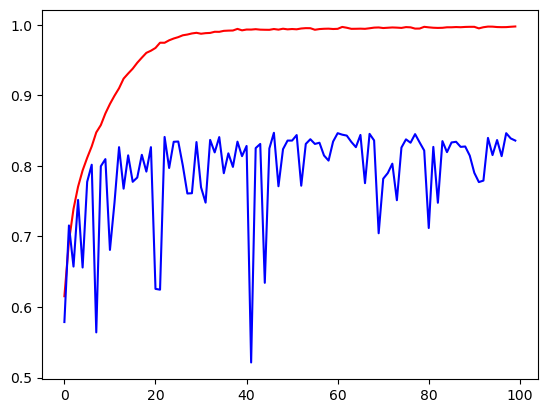

In [16]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, color='r')
plt.plot(val_acc, color='b')

plt.show()